Link Dataset : https://www.kaggle.com/datasets/masarief/rokok-sampoerna-splash


In [57]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [58]:
!kaggle datasets download -d masarief/rokok-sampoerna-splash

 99% 49.0M/49.7M [00:03<00:00, 24.0MB/s]
100% 49.7M/49.7M [00:03<00:00, 15.7MB/s]


In [59]:
!unzip rokok-sampoerna-splash.zip -d dataset_directory

Archive:  rokok-sampoerna-splash.zip
replace dataset_directory/spring/spring (1).jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [35]:
!unzip rokok-sampoerna-splash.zip -d rokok_dataset

Archive:  rokok-sampoerna-splash.zip
replace rokok_dataset/spring/spring (1).jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [60]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

In [61]:
path = '/content/rokok_dataset'

In [62]:
import os

In [63]:
kategori = os.listdir(path)
kategori

['sunny', 'spring', 'tropical']

Mengatur path dataset menjadi 3 train, val, dan test

In [64]:
train_dir = '/content/rokok_dataset'
validation_dir = '/content/rokok_dataset'
test_dir = '/content/rokok_dataset'

Menggunakan ImageDataGenerator untuk memuat serta melakukan augmentasi pada

In [65]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


In [66]:
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

**Split dataset menjadi train, val, dan test**

Data Train

In [67]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 318 images belonging to 3 classes.


Data Val

In [68]:
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 318 images belonging to 3 classes.


Data Test

In [69]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 318 images belonging to 3 classes.


* Membuat model sequential

In [70]:
model = Sequential()

* Menggunakan pre-trained model VGG16

In [71]:
base_model = VGG16(include_top=False, weights='imagenet', input_shape=(150, 150, 3))
base_model.trainable = False

model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

* Menggunakan optimizer, loss, dan metrics

In [72]:
model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

* Menggunakan Callbacks

In [73]:
early_stopping = EarlyStopping(patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(factor=0.1, patience=3)

* Latih Model

In [74]:
history = model.fit(
    train_generator,
    epochs=15,
    validation_data=validation_generator,
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/15
10/10 [==============================] - 11s 1s/step - loss: -2.7971 - accuracy: 0.3333 - val_loss: -10.1358 - val_accuracy: 0.3333 - lr: 0.0010
Epoch 2/15
10/10 [==============================] - 9s 942ms/step - loss: -13.1334 - accuracy: 0.3679 - val_loss: -22.5728 - val_accuracy: 0.4717 - lr: 0.0010
Epoch 3/15
10/10 [==============================] - 10s 1s/step - loss: -24.5790 - accuracy: 0.3836 - val_loss: -39.3364 - val_accuracy: 0.4151 - lr: 0.0010
Epoch 4/15
10/10 [==============================] - 10s 1s/step - loss: -40.2241 - accuracy: 0.3522 - val_loss: -59.4140 - val_accuracy: 0.4277 - lr: 0.0010
Epoch 5/15
10/10 [==============================] - 10s 1s/step - loss: -59.5895 - accuracy: 0.3805 - val_loss: -84.3191 - val_accuracy: 0.4245 - lr: 0.0010
Epoch 6/15
10/10 [==============================] - 10s 1s/step - loss: -80.8658 - accuracy: 0.3805 - val_loss: -112.4902 - val_accuracy: 0.4403 - lr: 0.0010
Epoch 7/15
10/10 [==============================] - 9s 9

* Evaluasi model

In [75]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Akurasi pada data test: {test_accuracy:.2f}')

10/10 [==============================] - 5s 468ms/step - loss: -638.5746 - accuracy: 0.4497
Akurasi pada data test: 0.45


* Membuat grafik pergerakan metrik Accuracy dan Loss terhadap epoch pada Training dan Validation

In [76]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

* Grafik Accuracy

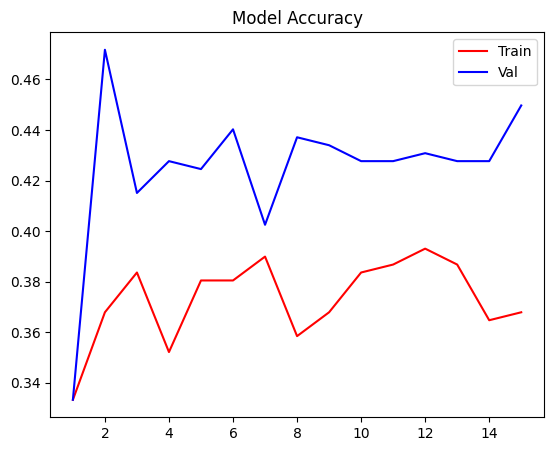

In [77]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'r', label='Train')
plt.plot(epochs, val_acc, 'b', label='Val')
plt.title('Model Accuracy')
plt.legend()

* Grafik Loss

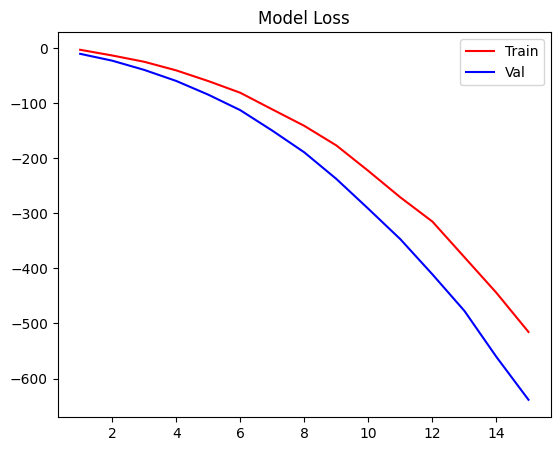

In [78]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'r', label='Train')
plt.plot(epochs, val_loss, 'b', label='Val')
plt.title('Model Loss')
plt.legend()

plt.show()